In [1]:
pwd

'/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF+Newton/Server_all_experiments/recursive_all/emo_recursive'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
new_pred_k = np.load("new_predictions_emo_LR_I100_D1.npy", allow_pickle=True).squeeze()
app_k = np.array(np.load("NT_app_k_emo_LR_I100_D1.npy", allow_pickle=True).squeeze())
old_prediction = np.load("/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF/Logistic_emotion/old_predictions.npy", allow_pickle=True).squeeze()
#exact_ks = np.load("exact_ks_IP.npy", allow_pickle=True)
#pred = np.load("pred.npy", allow_pickle=True)
app_k.shape

(1003,)

In [3]:
pred = old_prediction

In [4]:
new_pred_k_nonon = [new_pred_k[i] for i in range(len(new_pred_k)) if new_pred_k[i] != None]
len(new_pred_k_nonon)

916

# can find smallest k

In [5]:
app_k_nonon = [app_k[i] for i in range(len(new_pred_k)) if new_pred_k[i] != None]
len(new_pred_k_nonon)

916

In [6]:
np.mean(app_k_nonon)

344.54366812227073

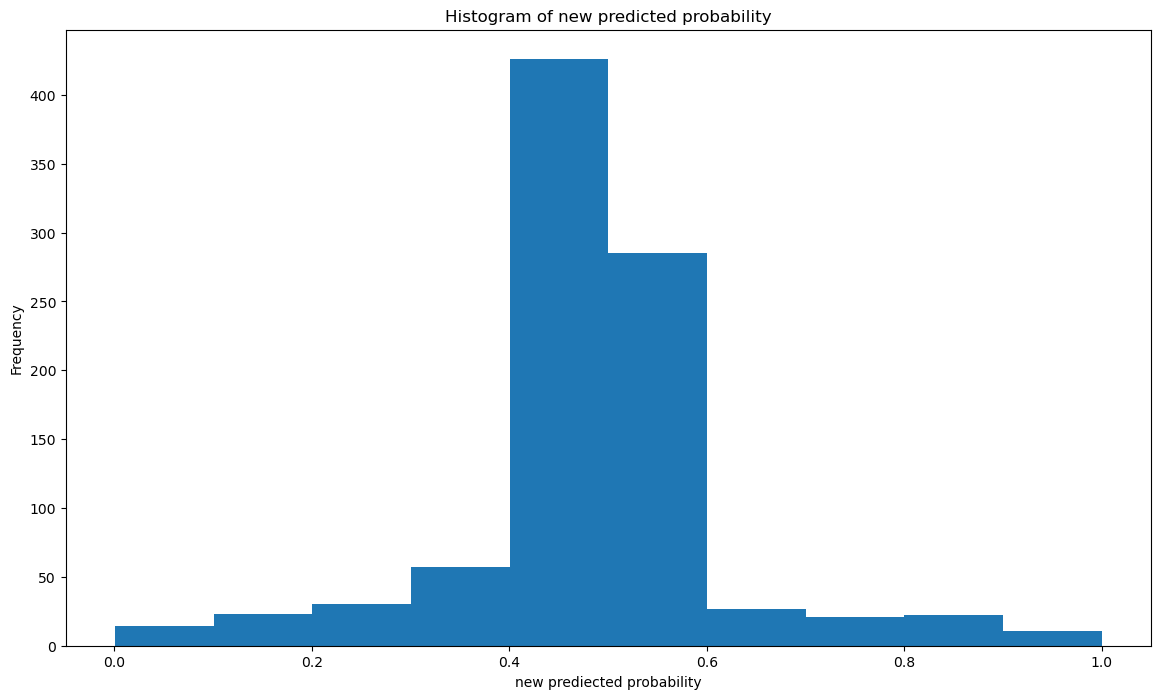

In [7]:
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(new_pred_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

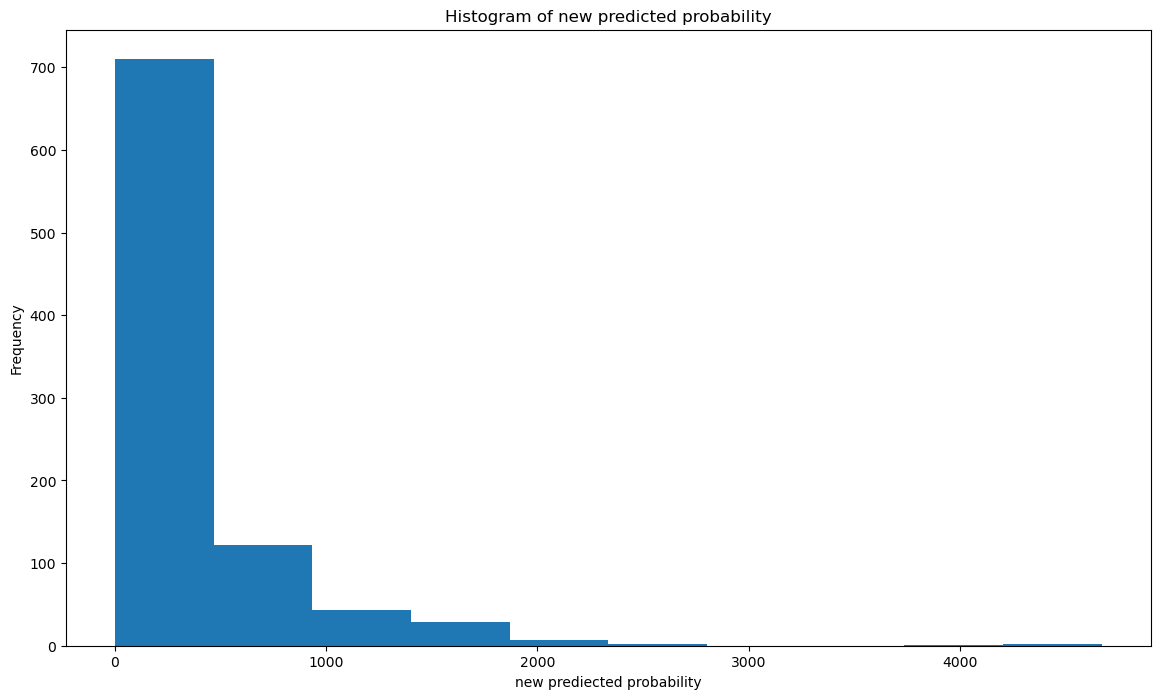

In [8]:

plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(app_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

In [9]:
pwd

'/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF+Newton/Server_all_experiments/recursive_all/emo_recursive'

In [10]:
flips = np.zeros((len(new_pred_k), 1))
diff = np.zeros((len(new_pred_k), 1))

#1: flip the label, 0: not flip the label, 2: cannot found k
for i in range(1003):
    print("i", i)
    if app_k[i] != None:
        if np.round(pred[i].item()) != np.round(new_pred_k[i].item()):
            flips[i, :] = 1
        else:
            flips[i, :] = 0  
            
        diff[i] = new_pred_k[i] - 0.5
        
        print("old", pred[i].item())
        print("new", new_pred_k[i].item())
        print("appro k", app_k[i])
        print("flip label", flips[i, :])
        print()
        
    else:
        flips[i, :] = 2
        #print("appro k", app_k[i])

i 0
old 0.4281949532461735
new 0.5019768601876313
appro k 38
flip label [1.]

i 1
old 0.6384329207747343
new 0.4901647797597681
appro k 118
flip label [1.]

i 2
old 0.13458845458938548
new 0.8567191286173411
appro k 1681
flip label [1.]

i 3
old 0.24096942964916382
new 0.5663369594507012
appro k 214
flip label [1.]

i 4
old 0.6855117940043363
new 0.4805084069270918
appro k 130
flip label [1.]

i 5
old 0.4189420896037263
new 0.5026410465749959
appro k 94
flip label [1.]

i 6
old 0.11920936188965771
new 0.8880149777811668
appro k 1144
flip label [1.]

i 7
old 0.5274833241784838
new 0.4996068660022149
appro k 14
flip label [1.]

i 8
old 0.40635268531973606
new 0.5038702732388425
appro k 54
flip label [1.]

i 9
i 10
old 0.43230362255005245
new 0.5018260649363755
appro k 37
flip label [1.]

i 11
old 0.6263903784784444
new 0.4898164964683571
appro k 156
flip label [1.]

i 12
old 0.8442239103210835
new 0.2262541070794591
appro k 1166
flip label [1.]

i 13
old 0.11816691744774016
new 0.9189842

In [11]:
# flip the label
num_flip = np.sum([flips[i] == 1 for i in range(len(new_pred_k))])
num_flip

914

In [12]:
app_k.shape

(1003,)

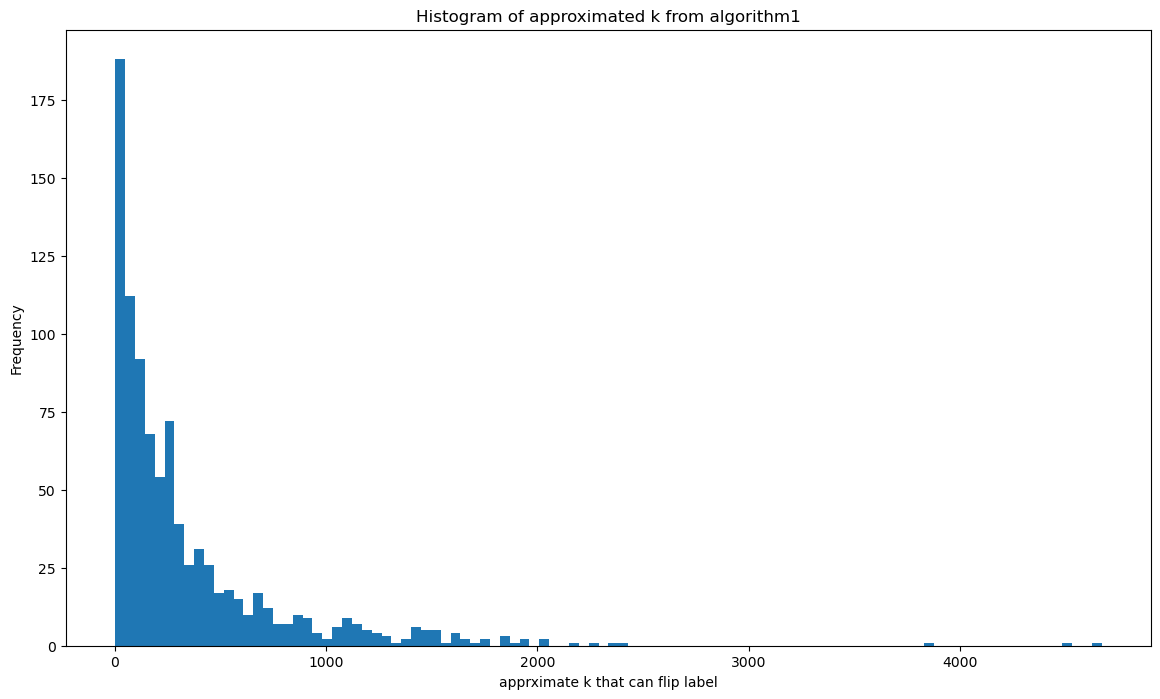

In [13]:

flip_idx = np.array([i for i in range(len(new_pred_k)) if flips[i] == 1 ])
K_flip = app_k[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

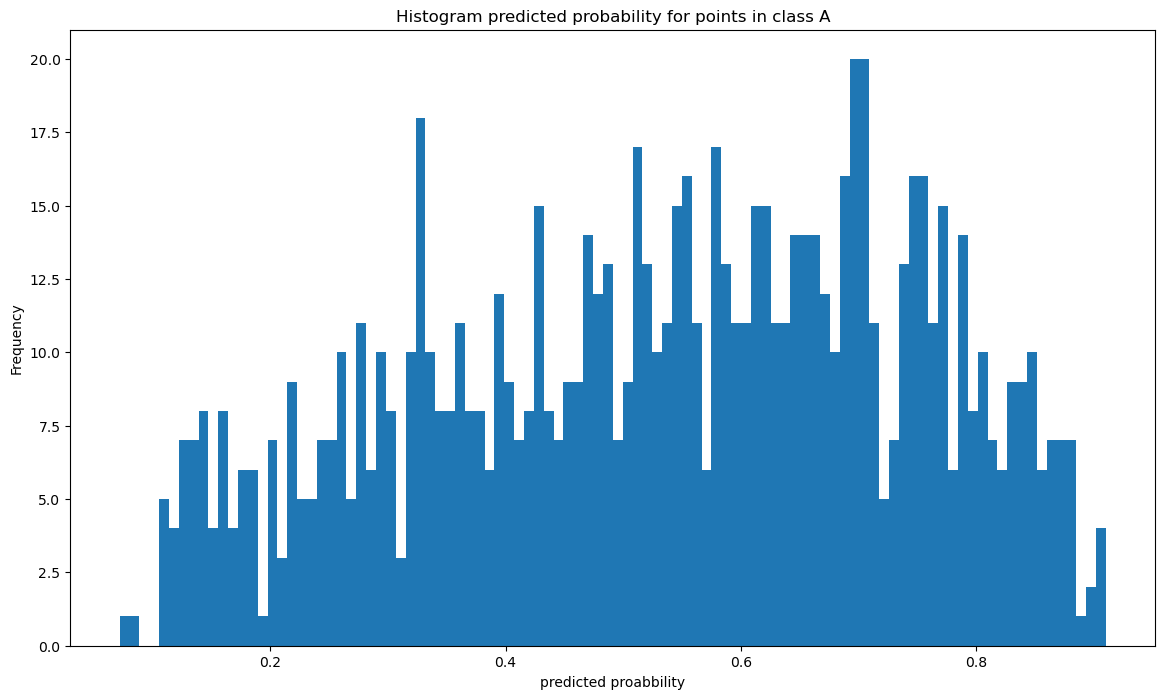

In [14]:
old_prediction
K_flip = old_prediction[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("predicted proabbility")
plt.ylabel("Frequency")
plt.title("Histogram predicted probability for points in class A")
plt.show()

In [15]:
# not flip the label
num_noflip = np.sum([flips[i] == 0 for i in range(len(new_pred_k))])
num_noflip

2

In [16]:
# diff for those flip the lable
diff1=[diff[i] for i in range(len(new_pred_k)) if flips[i] == 1]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.07256473569613069, 0.012479914138651332)

In [17]:
# diff for those not flip the lable
diff1=[diff[i] for i in range(len(new_pred_k)) if flips[i] == 0]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(7.097224393989854e-05, 4.587925353110677e-09)